In [1]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv
# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import functools
from spectrum import *
from pylab import plot
from scipy import signal
import numpy as np
import time
from scipy import stats
# Enable inline plotting

In [2]:
Location = r'C:\Users\euripab\Desktop\ML Extraction\CellCorr Corrected\ResCellCorr2.xlsx'
ResCellCorr = pd.read_excel(Location)
Location = r'C:\Users\euripab\Desktop\ML Extraction\CellCorr Corrected\GareCellCorr2.xlsx'
GareCellCorr = pd.read_excel(Location)
Location = r'C:\Users\euripab\Desktop\ML Extraction\CellCorr Corrected\ChatLesHallesCellCorr2.xlsx'
ChatLesHallesCellCorr = pd.read_excel(Location)
Location = r'C:\Users\euripab\Desktop\ML Extraction\CellCorr Corrected\ConcordeCellCorr2.xlsx'
ConcordeCellCorr = pd.read_excel(Location)
Location = r'C:\Users\euripab\Desktop\ML Extraction\CellCorr Corrected\RiveDroiteCellCorr2.xlsx'
RiveDroiteCellCorr = pd.read_excel(Location)
Location = r'C:\Users\euripab\Desktop\ML Extraction\CellCorr Corrected\alldata_CellCleanCorr2.xlsx'
AllDataCellCorr = pd.read_excel(Location)

In [3]:
def getUncorrelatedUnits(UnitCorrMatrix):
    for Unit in UnitCorrMatrix.index.unique():
        UnitCorrMatrix[Unit][Unit] = 0
    ind = (np.array([UnitCorrMatrix[UnitCorrMatrix.abs().idxmax(axis=0).take([i]).index[0]][UnitCorrMatrix.abs().idxmax(axis=0).take([i]).values[0]] for i in range(0,len(UnitCorrMatrix.abs().idxmax(axis=0)))]).argmax()) 
    MAX = (np.array([UnitCorrMatrix[UnitCorrMatrix.abs().idxmax(axis=0).take([i]).index[0]][UnitCorrMatrix.abs().idxmax(axis=0).take([i]).values[0]] for i in range(0,len(UnitCorrMatrix.abs().idxmax(axis=0)))]).max())
    if MAX > 0.7:
        A = np.array(UnitCorrMatrix[UnitCorrMatrix.abs().idxmin(axis=0).take([ind]).index[0]].values)
        A = A[np.where(A>0.7)]
        B = np.array(UnitCorrMatrix[UnitCorrMatrix.abs().idxmin(axis=0).take([ind]).values[0]].values)
        B = A[np.where(A>0.7)]
        if len(A) <len(B):
            FiltredCorrMatrix = UnitCorrMatrix.drop([UnitCorrMatrix.abs().idxmax(axis=0).take([ind]).index[0]],axis=0)
            FiltredCorrMatrix = FiltredCorrMatrix.drop([UnitCorrMatrix.abs().idxmax(axis=0).take([ind]).index[0]],axis=1)
            return(getUncorrelatedUnits(FiltredCorrMatrix))
        else: 
            FiltredCorrMatrix = UnitCorrMatrix.drop([UnitCorrMatrix.abs().idxmax(axis=0).take([ind]).values[0]],axis=0)
            FiltredCorrMatrix = FiltredCorrMatrix.drop([UnitCorrMatrix.abs().idxmax(axis=0).take([ind]).values[0]],axis=1)
            return(getUncorrelatedUnits(FiltredCorrMatrix))
    else:
        for Unit in UnitCorrMatrix.index.unique():
            UnitCorrMatrix[Unit][Unit] = 1
        return(UnitCorrMatrix)

In [4]:
ResCellCorr[ResCellCorr.abs().idxmin(axis=0).take([1]).values[0]].values[np.where(ResCellCorr[ResCellCorr.abs().idxmin(axis=0).take([1]).values[0]].values>0.7)]

array([1.])

In [5]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
Pandas version 0.23.0
Matplotlib version 2.2.2


In [6]:
ResCellCorr.abs().idxmin(axis=0)['L15843B']

'T10664A'

In [7]:
uncorr_all = getUncorrelatedUnits(AllDataCellCorr)

In [8]:
def KpiCorrCalculation(ZoneDataFrame,cell_list):
    allkpiallcells = pd.DataFrame()
    for kpi in column_kpiselection:
        kpiallcells = pd.Series()
        for cell in cell_list:
            CelluleData = ZoneDataFrame.loc[ZoneDataFrame['CellName']==cell][['DAY_',kpi]]
            CelluleData['DAY_'] = pd.to_datetime(CelluleData['DAY_'],infer_datetime_format=True)
            CelluleData.sort_values(by='DAY_')
            CelluleData[kpi] = (CelluleData[kpi] - CelluleData[kpi].min())/(CelluleData[kpi].max() - CelluleData[kpi].min())
            kpiallcells = kpiallcells.append(CelluleData[kpi],ignore_index = True)
        allkpiallcells[kpi] = kpiallcells
    return(allkpiallcells.corr())

In [9]:
from datetime import timedelta, date
def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

start_date = date(2018, 8, 7)
end_date = date(2018, 8, 29)
column_selection = ["DAY_","Departement","SiteTheorique","eNodeBName","Secteur","CellName","CQImoyen_Convert","CROZON_DemandesVoix4G",
                    "CROZON_NombredeConnexionsPS","CROZON_SucceseRABData4G","CROZON_TraficDataDL4G","CROZON_SucceseRABPS4G","CoupuresData",
                    "CROZON_SucceseRABVoix4G","CSFB_Tot","CROZON_TDC4GData","CROZON_CoupureseRABData4G_old","CROZON_TDC4GData_Mobilite",
                    "CROZON_DemandesData4G","CROZON_TDC4GDataCluster","Badcoveragedetected_A2_","CROZON_TDC4GDataCluster_Mobilite",
                    "CROZON_CoupureseRABPS4G","CROZON_TDC4GPSCluster_Mobilite","CROZON_TDC4GPS","CQImoyen","CROZON_TDC4GPS_Mobilite",
                    "CROZON_TraficDataUL4G","CROZON_TDC4GPSCluster","ErabrelnormalQCI9","ErabRelQCi5","nbUEVoIPqualityOK","nbUEVoIPqualityNOK",
                    "Nbrtentatives_QCi5__TEAVoix","Nbrtentatives_QCi5__TEAVisio","Nbrtentatives_QCi1_","NbreConn_Voix","ErabrelnormalQCI5",
                    "ErabVoixRelease_Cellule","ErabrelnormalQCI8","NbHOPrepAttIFLB","ErabVoixRelease_Cluster","ErabrelnormalQCI6","NbdropsDataActifseNodeB",
                    "NbreConn_Data","NbHOExeAttIFLB","TBRe_transPUSCH","TBRetransPDSCH","TBtransPUSCH","SCTot","TBtransPDSCH","PingPong_HOinter_HOOscillation",
                    "TraficDataDL","PingPong_HOintra_HOOscillation","TraficDataUL","Traficvoix_Traficvoix_visio","VoIPqualitymeasinsuffstat"]          

In [10]:
#Regroupe data of all dates 1
datestring = end_date.strftime("%Y%m%d")
Location1 =  str('C:/Users/euripab/Desktop/ML Extraction/Modified Files/')+datestring+'_1.CSV'
date_data = pd.read_csv(Location1, sep=';', encoding='latin-1')
data_1 = pd.read_csv(Location1, sep=';', encoding='latin-1')
data_1  = data_1[column_selection]

for single_date in daterange(start_date, end_date):
    datestring = single_date.strftime("%Y%m%d")
    Location1 =  str('C:/Users/euripab/Desktop/ML Extraction/Modified Files/')+datestring+'_1.CSV'
    date_data = pd.read_csv(Location1, sep=';', encoding='latin-1')
    date_data = date_data[column_selection]
    data_1 = data_1.append(date_data)

C:\Users\euripab\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (625,626,627,628) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
#Regroupe data of all dates 2
datestring = end_date.strftime("%Y%m%d")
Location2 =  str('C:/Users/euripab/Desktop/ML Extraction/Modified Files/')+datestring+'_2.CSV'
date_data = pd.read_csv(Location2, sep=';', encoding='latin-1')
data_2 = pd.read_csv(Location2, sep=';', encoding='latin-1')
data_2  = data_2[column_selection]

for single_date in daterange(start_date, end_date):
    datestring = single_date.strftime("%Y%m%d")
    Location2 =  str('C:/Users/euripab/Desktop/ML Extraction/Modified Files/')+datestring+'_2.CSV'
    date_data = pd.read_csv(Location2, sep=';', encoding='latin-1')
    date_data = date_data[column_selection]
    data_2 = data_2.append(date_data)

C:\Users\euripab\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (625,626,627,628) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
#Create Final Data File
alldata_kpis = data_1.append(data_2)
print(alldata_kpis.dtypes)
column_kpiselection = ["CQImoyen_Convert","CROZON_DemandesVoix4G",
                    "CROZON_NombredeConnexionsPS","CROZON_SucceseRABData4G","CROZON_TraficDataDL4G","CROZON_SucceseRABPS4G","CoupuresData",
                    "CROZON_SucceseRABVoix4G","CSFB_Tot","CROZON_TDC4GData","CROZON_CoupureseRABData4G_old","CROZON_TDC4GData_Mobilite",
                    "CROZON_DemandesData4G","CROZON_TDC4GDataCluster","Badcoveragedetected_A2_","CROZON_TDC4GDataCluster_Mobilite",
                    "CROZON_CoupureseRABPS4G","CROZON_TDC4GPSCluster_Mobilite","CROZON_TDC4GPS","CQImoyen","CROZON_TDC4GPS_Mobilite",
                    "CROZON_TraficDataUL4G","CROZON_TDC4GPSCluster","ErabrelnormalQCI9","ErabRelQCi5","nbUEVoIPqualityOK","nbUEVoIPqualityNOK",
                    "Nbrtentatives_QCi5__TEAVoix","Nbrtentatives_QCi5__TEAVisio","Nbrtentatives_QCi1_","NbreConn_Voix","ErabrelnormalQCI5",
                    "ErabVoixRelease_Cellule","ErabrelnormalQCI8","NbHOPrepAttIFLB","ErabVoixRelease_Cluster","ErabrelnormalQCI6","NbdropsDataActifseNodeB",
                    "NbreConn_Data","NbHOExeAttIFLB","TBRe_transPUSCH","TBRetransPDSCH","TBtransPUSCH","SCTot","TBtransPDSCH","PingPong_HOinter_HOOscillation",
                    "TraficDataDL","PingPong_HOintra_HOOscillation","TraficDataUL","Traficvoix_Traficvoix_visio","VoIPqualitymeasinsuffstat"]


column_kpiselection = ["CQImoyen_Convert","CROZON_DemandesVoix4G",
                    "CROZON_NombredeConnexionsPS","CROZON_SucceseRABData4G","CROZON_TraficDataDL4G","CROZON_SucceseRABPS4G","CoupuresData",
                    "CROZON_SucceseRABVoix4G","CSFB_Tot","CROZON_TDC4GData","CROZON_TDC4GData_Mobilite",
                    "CROZON_DemandesData4G","CROZON_TDC4GDataCluster","CROZON_TDC4GDataCluster_Mobilite",
                    "CROZON_CoupureseRABPS4G","CROZON_TDC4GPSCluster_Mobilite","CROZON_TDC4GPS","CQImoyen","CROZON_TDC4GPS_Mobilite",
                    "CROZON_TraficDataUL4G","CROZON_TDC4GPSCluster","ErabrelnormalQCI9","ErabRelQCi5","nbUEVoIPqualityOK",
                    "Nbrtentatives_QCi5__TEAVoix","Nbrtentatives_QCi5__TEAVisio","Nbrtentatives_QCi1_","NbreConn_Voix","ErabrelnormalQCI5",
                    "ErabVoixRelease_Cellule","ErabrelnormalQCI8","NbHOPrepAttIFLB","ErabrelnormalQCI6",
                    "NbreConn_Data",
                    "TraficDataDL","TraficDataUL","Traficvoix_Traficvoix_visio"]

alldata_kpis[column_kpiselection] = alldata_kpis[column_kpiselection].astype(str).apply(lambda x: x.str.replace(',','.'))
alldata_kpis[column_kpiselection] = alldata_kpis[column_kpiselection].astype(float)
alldata_kpis['DAY_'] = alldata_kpis['DAY_'].astype(date)
alldata_kpis = alldata_kpis.drop(['Departement','SiteTheorique','eNodeBName','Secteur'], axis = 1)

DAY_                                object
Departement                          int64
SiteTheorique                       object
eNodeBName                          object
Secteur                             object
CellName                            object
CQImoyen_Convert                    object
CROZON_DemandesVoix4G                int64
CROZON_NombredeConnexionsPS          int64
CROZON_SucceseRABData4G              int64
CROZON_TraficDataDL4G               object
CROZON_SucceseRABPS4G                int64
CoupuresData                         int64
CROZON_SucceseRABVoix4G              int64
CSFB_Tot                             int64
CROZON_TDC4GData                    object
CROZON_CoupureseRABData4G_old        int64
CROZON_TDC4GData_Mobilite           object
CROZON_DemandesData4G                int64
CROZON_TDC4GDataCluster             object
Badcoveragedetected_A2_              int64
CROZON_TDC4GDataCluster_Mobilite    object
CROZON_CoupureseRABPS4G              int64
CROZON_TDC4

In [13]:
#Clean Cells That Have only 0 values for 
def CleanNullCells(ZoneDataFrame):
    for kpi in column_kpiselection:
        for cell in ZoneDataFrame['CellName'].unique():
            CelluleData = ZoneDataFrame.loc[ZoneDataFrame['CellName']==cell][['DAY_',kpi]]
            if(CelluleData[kpi] == 0).all():
                  ZoneDataFrame = ZoneDataFrame.loc[ZoneDataFrame['CellName'] != cell]
    return(ZoneDataFrame) 

In [14]:
alldata_kpisClean = CleanNullCells(alldata_kpis)

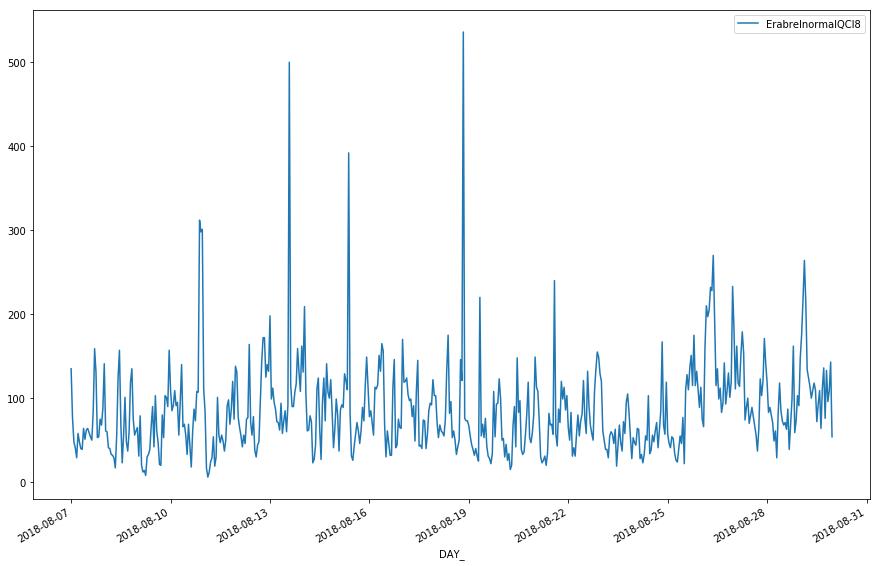

In [15]:
from sklearn.preprocessing import StandardScaler
#Spectral Analysis
L10939C_ErabrelnormalQCI8 = alldata_kpis.loc[alldata_kpis['CellName']=='L10939C'][['DAY_','ErabrelnormalQCI8']]
L10939C_ErabrelnormalQCI8['DAY_'] = pd.to_datetime(L10939C_ErabrelnormalQCI8['DAY_'],infer_datetime_format=True)
L10939C_ErabrelnormalQCI8.sort_values(by='DAY_')
L10939C_ErabrelnormalQCI8.plot(x='DAY_',y='ErabrelnormalQCI8',kind='line',figsize = (15,10))


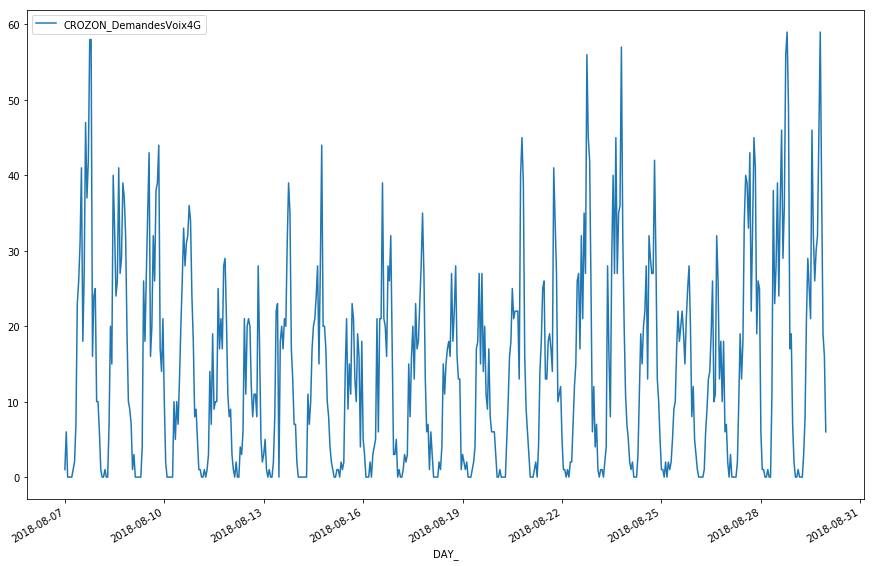

In [16]:
#Spectral Analysis
#Spectral Analysis
L10939B_CROZON_DemandesVoix4G = alldata_kpis.loc[alldata_kpis['CellName']=='L10939B'][['DAY_','CROZON_DemandesVoix4G']]
L10939B_CROZON_DemandesVoix4G['DAY_'] = pd.to_datetime(L10939B_CROZON_DemandesVoix4G['DAY_'],infer_datetime_format=True)
L10939B_CROZON_DemandesVoix4G.sort_values(by='DAY_')
L10939B_CROZON_DemandesVoix4G.plot(x='DAY_',y='CROZON_DemandesVoix4G',kind='line',figsize = (15,10))


In [17]:
from datetime import timedelta, date, datetime
def KSTestPerDay(cell1,cell2,kpi):
    cell1_kpi = alldata_kpis.loc[alldata_kpis['CellName']==cell1][['DAY_',kpi]]
    cell1_kpi['DAY_'] = pd.to_datetime(cell1_kpi['DAY_'],infer_datetime_format=True)
   
    
    cell2_kpi = alldata_kpis.loc[alldata_kpis['CellName']==cell2][['DAY_',kpi]]
    cell2_kpi['DAY_'] = pd.to_datetime(cell2_kpi['DAY_'],infer_datetime_format=True)
  
    KS = pd.DataFrame()
    for day in np.array([datetime(2018,8,7)+timedelta(days=i) for i in range(0,22)]):
        dayvalue = pd.DataFrame()
        dayvalue['Day'] = [day]
        mask1 = (cell1_kpi['DAY_'] >=day) & (cell1_kpi['DAY_'] <day+timedelta(days=1))
        mask2 = (cell2_kpi['DAY_'] >=day) & (cell2_kpi['DAY_'] <day+timedelta(days=1))
        dayvalue['pvalue'] = [stats.ks_2samp(cell1_kpi.loc[mask1][kpi],cell2_kpi.loc[mask2][kpi])[1]]
        KS = KS.append(dayvalue,ignore_index = True)
    return(KS)

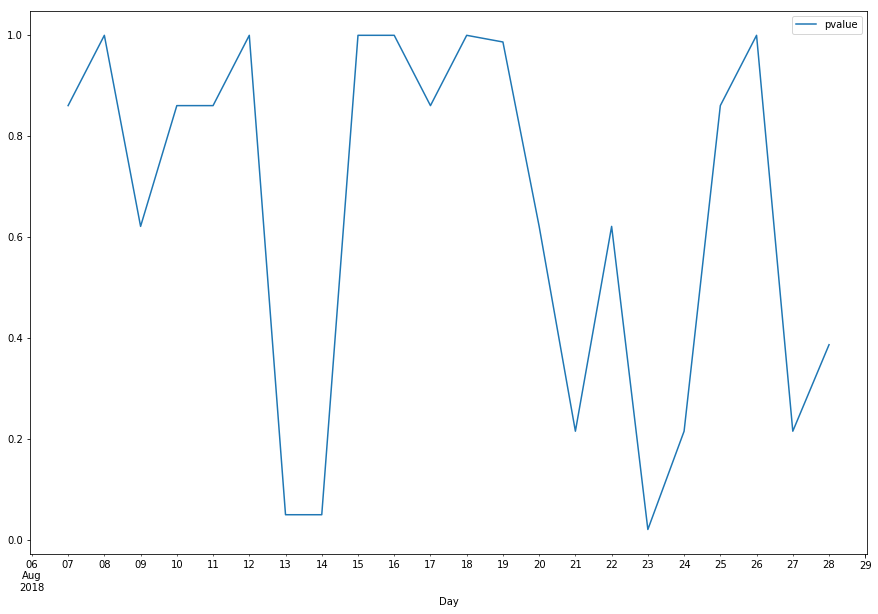

In [18]:
KSTestPerDay('L10939B','L10939C','SCTot').plot(x='Day',y='pvalue',kind='line',figsize = (15,10))

In [19]:
KSTestPerDay('L10939B','L10939C','SCTot')['pvalue'].mean()

0.6505965919763553

In [20]:
from datetime import timedelta, date, datetime
def KSTestPerWeek(cell1,cell2,kpi):
    cell1_kpi = alldata_kpis.loc[alldata_kpis['CellName']==cell1][['DAY_',kpi]]
    cell1_kpi['DAY_'] = pd.to_datetime(cell1_kpi['DAY_'],infer_datetime_format=True)
    cell1_kpi.sort_values(by='DAY_')
    
    cell2_kpi = alldata_kpis.loc[alldata_kpis['CellName']==cell2][['DAY_',kpi]]
    cell2_kpi['DAY_'] = pd.to_datetime(cell2_kpi['DAY_'],infer_datetime_format=True)
    cell2_kpi.sort_values(by='DAY_')
    
    KS = pd.DataFrame()
    for week in np.array([datetime(2018,8,7)+timedelta(weeks=i) for i in range(0,3)]):
        dayvalue = pd.DataFrame()
        dayvalue['Week'] = [week]
        mask1 = (cell1_kpi['DAY_'] >week) & (cell1_kpi['DAY_'] <week+timedelta(days=1))
        mask2 = (cell2_kpi['DAY_'] >week) & (cell2_kpi['DAY_'] <week+timedelta(days=1))
        dayvalue['pvalue'] = [stats.ks_2samp(cell1_kpi.loc[mask1][kpi],cell2_kpi.loc[mask2][kpi])[1]]
        KS = KS.append(dayvalue,ignore_index = True)
    return(KS)

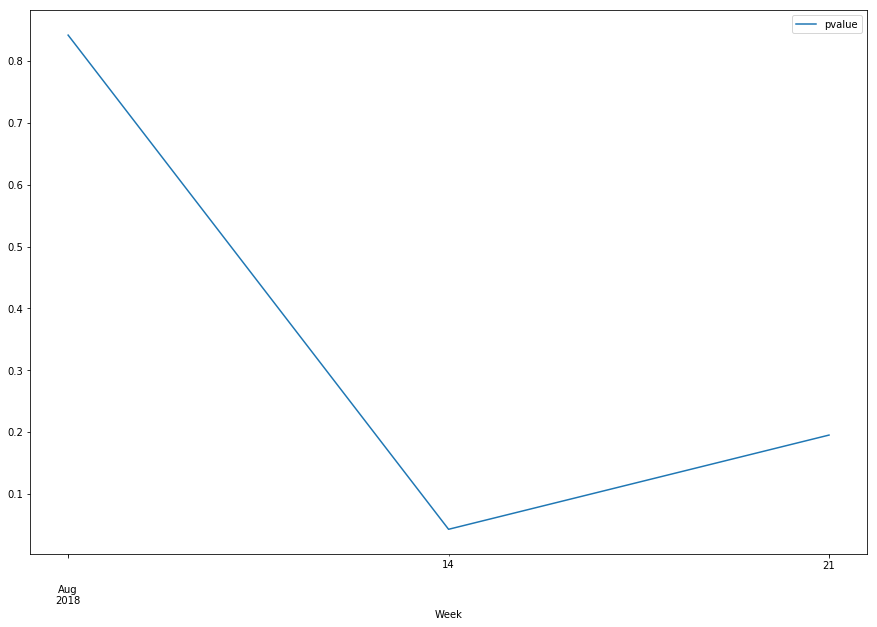

In [21]:
KSTestPerWeek('L10939B','L10939C','SCTot').plot(x='Week',y='pvalue',kind='line',figsize = (15,10))


In [22]:
def KSTestHoleTime(cell1,cell2,kpi):
    cell1_kpi = alldata_kpis.loc[alldata_kpis['CellName']==cell1][['DAY_',kpi]]
    cell1_kpi['DAY_'] = pd.to_datetime(cell1_kpi['DAY_'],infer_datetime_format=True)
    cell1_kpi.sort_values(by='DAY_')
    cell1_kpi[kpi] = (cell1_kpi[kpi] - cell1_kpi[kpi].min())/(cell1_kpi[kpi].max() - cell1_kpi[kpi].min())
    
    cell2_kpi = alldata_kpis.loc[alldata_kpis['CellName']==cell2][['DAY_',kpi]]
    cell2_kpi['DAY_'] = pd.to_datetime(cell2_kpi['DAY_'],infer_datetime_format=True)
    cell2_kpi.sort_values(by='DAY_')
    cell2_kpi[kpi] = (cell2_kpi[kpi] - cell2_kpi[kpi].min())/(cell2_kpi[kpi].max() - cell2_kpi[kpi].min())
    
    KS = pd.DataFrame()
    dayvalue = pd.DataFrame()
    dayvalue['pvalue'] = [stats.ks_2samp(cell1_kpi[kpi],cell2_kpi[kpi])[1]]
    KS = KS.append(dayvalue,ignore_index = True)
    return(KS)

In [23]:
KSTestHoleTime('T16785A','L10939C','NbdropsDataActifseNodeB')

,pvalue
0,9.633399e-10


In [24]:
def KSTestAllCellsPerDayAverage(ZoneDataFrame,kpi):
    KS = pd.DataFrame()
    alreadyDoneCouples = []
    for cell1 in ZoneDataFrame['CellName'].unique():
        for cell2 in ZoneDataFrame['CellName'].unique():
            if cell1 == cell2:
                KS.loc[str(cell1),str(cell2)] = float(1)
            elif [cell2,cell1] in alreadyDoneCouples:
                KS.loc[str(cell1),str(cell2)] = KS.loc[str(cell2)][str(cell1)]
            else:
                avg = KSTestPerDay(cell1,cell2,kpi).mean()
                KS.loc[str(cell1),str(cell2)] = float(avg)
                alreadyDoneCouples.append([cell1,cell2])
    return(KS)
            

In [25]:
Location = r'C:\Users\euripab\Desktop\ML Extraction\CellType.xlsx'
CellGeoType = pd.read_excel(Location)
CellRes = CellGeoType.loc[CellGeoType['Type']=='residentiel']
CellGare = CellGeoType.loc[CellGeoType['Type']=='Gare_St_lazare']
CellChatLesHalles = CellGeoType.loc[CellGeoType['Type']=='Chatelet_les_halles']
CellRiveDroite = CellGeoType.loc[CellGeoType['Type']=='rive_droite_seine']
CellConcorde = CellGeoType.loc[CellGeoType['Type']=='concorde']

In [26]:
ResCellsKpi = alldata_kpisClean.loc[alldata_kpisClean['CellName'].isin(CellRes['CellName'])]
GareCellsKpi = alldata_kpisClean.loc[alldata_kpisClean['CellName'].isin(CellGare['CellName'])]
ChatLesHallesCellsKpi = alldata_kpisClean.loc[alldata_kpisClean['CellName'].isin(CellChatLesHalles['CellName'])]
RiveDroiteCellsKpi = alldata_kpisClean.loc[alldata_kpisClean['CellName'].isin(CellRiveDroite['CellName'])]
ConcordeCellsKpi = alldata_kpisClean.loc[alldata_kpisClean['CellName'].isin(CellConcorde['CellName'])]

In [27]:
ksRESCQI = KSTestAllCellsPerDayAverage(ResCellsKpi,'CQImoyen')

In [28]:
ksRESTraficDataDL = KSTestAllCellsPerDayAverage(ResCellsKpi,'TraficDataDL')

KeyboardInterrupt: 

In [ ]:
ksRESTraficDataUL = KSTestAllCellsPerDayAverage(ResCellsKpi,'TraficDataUL')

In [ ]:
writer = pd.ExcelWriter('TraficDataUL.xlsx')
ksRESTraficDataUL.to_excel(writer,'TraficDataUL')
writer.save()

In [ ]:
ksRESCROZON_TDC4GData = KSTestAllCellsPerDayAverage(ResCellsKpi,'CROZON_TDC4GData')

In [ ]:
ksRESCROZON_DemandesVoix4G = KSTestAllCellsPerDayAverage(ResCellsKpi,'CROZON_DemandesVoix4G')

In [ ]:
def getIdenticallyDistributedUnits(KSTestMatrix, alreadyDeletedCells = []): 
    count = 0
    totalpvalues = float(0)
    ToDeleteCell = 0
    for cell in KSTestMatrix.index.unique():
        A = np.array(KSTestMatrix[cell].values)
        A = A[np.where(A<0.1)]
        if len(A)>0:
            if count < len(A):
                ToDeleteCell = cell 
                count = len(A)
                totalpvalues = sum(A)
            elif (count == len(A)) & (totalpvalues < float(sum(A))):
                ToDeleteCell = cell 
                count = len(A)
                totalpvalues = sum(A)
    if ToDeleteCell == 0:
        return([KSTestMatrix,alreadyDeletedCells])
    else:
        alreadyDeletedCells.append(ToDeleteCell)
        FiltredMatrix = KSTestMatrix.drop([ToDeleteCell], axis = 0)
        FiltredMatrix = FiltredMatrix.drop([ToDeleteCell], axis = 1)
        return(getIdenticallyDistributedUnits(FiltredMatrix,alreadyDeletedCells))
        
   

In [ ]:
getIdenticallyDistributedUnits(ksAll2)[0].values

In [ ]:
ksAll2.loc[ksAll2.index.str.startswith('D')][ksAll2.columns[ksAll2.columns.str.startswith('D')]]

In [ ]:
def getIdenticallyDistributedClusters(KSTestMatrix, partialResults=[]):
    Cluster = getIdenticallyDistributedUnits(KSTestMatrix,[])[0]
    DeletedCells = getIdenticallyDistributedUnits(KSTestMatrix,[])[1]
    partialResults.append(Cluster)
    if Cluster.size!=KSTestMatrix.size:
        Reste = KSTestMatrix.loc[DeletedCells][DeletedCells]
        return(getIdenticallyDistributedClusters(Reste,partialResults))
    else:
        return(partialResults)
    
    

In [ ]:
getIdenticallyDistributedClusters(ksRESCQI)

In [ ]:
getIdenticallyDistributedClusters(ksRESTraficDataDL,[])

In [ ]:
getIdenticallyDistributedClusters(ksRESCROZON_TDC4GData,[])

In [ ]:
def generateLabeledDataFromClusters(ClusterList,kpi):
    LabeledData = pd.DataFrame()
    Label = 0
    for cluster in ClusterList:
        for clustercell in cluster.index:
            LabeledData.loc[str(clustercell),str(kpi)+' Label'] = Label
        Label = Label + 1
    return(LabeledData)
        

In [ ]:
generateLabeledDataFromClusters(getIdenticallyDistributedClusters(ksRESCROZON_TDC4GData,[]),'CROZON_TDC4GData')

In [ ]:
def generateFeaturesFromCellList(CellList):
    FeaturesData = pd.DataFrame()
    for cell in CellList:
        FeaturesData.loc[cell,'Site'] = int(cell[1:len(cell)-1])
        if cell.startswith('D'):
            FeaturesData.loc[cell,'Tec'] = 0
            if cell[-1] =='A':
                FeaturesData.loc[cell,'Azimuth'] = 0
            elif cell[-1] =='B':
                FeaturesData.loc[cell,'Azimuth'] = 1
            elif cell[-1] =='C':
                FeaturesData.loc[cell,'Azimuth'] = 2    
        elif cell.startswith('L'):
            FeaturesData.loc[cell,'Tec'] = 1
            if cell[-1] =='A':
                FeaturesData.loc[cell,'Azimuth'] = 0
            elif cell[-1] =='B':
                FeaturesData.loc[cell,'Azimuth'] = 1
            elif cell[-1] =='C':
                FeaturesData.loc[cell,'Azimuth'] = 2
        elif cell.startswith('T'):
            FeaturesData.loc[cell,'Tec'] = 2
            if cell[-1] =='A':
                FeaturesData.loc[cell,'Azimuth'] = 0
            elif cell[-1] =='B':
                FeaturesData.loc[cell,'Azimuth'] = 1
            elif cell[-1] =='C':
                FeaturesData.loc[cell,'Azimuth'] = 2
    return(FeaturesData)
        

In [ ]:
generateFeaturesFromCellList(ksRESCROZON_TDC4GData.index)
 

In [ ]:
ksRESCROZON_TDC4GData.index

In [ ]:
X = generateFeaturesFromCellList(ksRESCQI.index).join(generateLabeledDataFromClusters(getIdenticallyDistributedClusters(ksRESCQI,[]),'CQImoyen'))
X

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth = 4)
clf = clf.fit(X.drop(['CQImoyen Label'],axis=1),X['CQImoyen Label'])
clf.score(X.drop(['CQImoyen Label'],axis=1),X['CQImoyen Label'])

In [ ]:
clf.feature_importances_ 

In [ ]:
Y = generateFeaturesFromCellList(ksRESCROZON_TDC4GData.index).join(generateLabeledDataFromClusters(getIdenticallyDistributedClusters(ksRESCROZON_TDC4GData,[]),'CROZON_TDC4GData'))
Y

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth = 6)
clf = clf.fit(Y.drop(['CROZON_TDC4GData Label'],axis=1),Y['CROZON_TDC4GData Label'])
clf.score(Y.drop(['CROZON_TDC4GData Label'],axis=1),Y['CROZON_TDC4GData Label'])

In [ ]:
clf.feature_importances_ 

In [ ]:
Z = generateFeaturesFromCellList(ksRESCROZON_DemandesVoix4G.index).join(generateLabeledDataFromClusters(getIdenticallyDistributedClusters(ksRESCROZON_DemandesVoix4G,[]),'CROZON_DemandesVoix4G'))
Z

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth = 6)
clf = clf.fit(Z.drop(['CROZON_DemandesVoix4G Label'],axis=1),Z['CROZON_DemandesVoix4G Label'])
clf.score(Z.drop(['CROZON_DemandesVoix4G Label'],axis=1),Z['CROZON_DemandesVoix4G Label'])

In [ ]:
clf.feature_importances_ 

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("CROZON_TDC4GData") 